# Assignment 8
There are two parts in this assignment, including theoretical questions and computational questions.

## Theoretical questions

### Q1. BA model
Give a reason why networks generated by the BA model do not have many triangles.

Per slide page 55 from Mar11-16-18, the answer is "To close a triangle we need to set a link between two neighboring nodes, whereas in the BA model links are set based on degree, regardless of whether the future neighbors have common neighbors"

### Q2. Link selection
Link selection consists in choosing a link and wiring a new node to one of its endpoints. Suppose that we wire the new node to both endpoints. What would be the difference from the random walk model? And how would networks generated by the two models differ?

The link section model would only produce one tradic clourse each time, while the random walk model would produce more than one tradic closure for each random link selection. Theredore, the random walk model will have higher average clustering coefficients.

### Q3. expanding triadic closure
Suppose that we wish to build a network such that there is a relevant amount of squares (cycles of length four). Based on what you learned about triadic closure, could you suggest a mechanism that incentivizes the formation of squares?

Start with a group of m0 nodes, usually fully connected (clique)
* At each step two new node i, j is added to the system, connect node i and j
* The first link targets a randomly chosen which endpoints are node u, v
* Link i to u, j to v then it forms a sqaure.


## Computational questions

### Q4. Nonlinear preferential attachment model

Write the code for the nonlinear preferential attachment model, by doing the necessary modifications to the code of the Barabasi-Albert model you have learned in the tutorial. Choose alpha=0, 0.5, 1, 1.5, 2, 3. The number of nodes is 1000, each node brings in 3 new links. You can start from a triangle.

* For each alpha-value build one network and compute its degree distribution. Put them all in the same plot, in double logarithmic scale. How does the degree distribution change with alpha? Explain your answer.

* Compute for each network the largest degree and divide it by the size of the network (here 1000). Plot the ratio as a function of alpha. Explain the result.

* Compare the model for alpha=1 with the Barabasi-Albert model, with the same parameters. Specifically, create a network with the BA model and compare the following features: degree distribution (in the same plot with double logarithmic scale), average clustering coefficient, knn as a function of k (average degree of neighbors of nodes with degree k as a function of k).



In [1]:
import itertools
import random as rn
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import statistics

In [2]:
def nonlinear_preferential_attachment(N, m, alpha):
    # 1. Start with a triangle
    G = nx.cycle_graph(m)
    
    for i in range(G.number_of_nodes(), N):
        # 2. Select m different nodes at random, weighted by their degree.
        new_neighbors = []
        possible_neighbors = list(G.nodes)
        for _ in range(m):
            degrees = [G.degree(n) for n in possible_neighbors]
            p = [i**alpha for i in degrees]
            j = rn.choices(possible_neighbors, p)[0] 
            new_neighbors.append(j)
            possible_neighbors.remove(j)
        
        # 3. Add a new node i and link it with the m nodes from the previous step.
        for j in new_neighbors:
            G.add_edge(i, j)
    return G

In [3]:
# get degree list for each alpha and put in a dictionary
alpha_list = [0, 0.5, 1, 1.5, 2, 3]

degree_list = []
for alpha in alpha_list:
    G = nonlinear_preferential_attachment(1000, 3, alpha) 
    degree_sequence = [G.degree(n) for n in G.nodes]
    degree_list.append((alpha, degree_sequence))
degree_dict = dict(degree_list)

In [4]:
from collections import Counter
# get degree count for each alpha
degree_counts_1 = Counter(degree_dict[0])
degree_counts_2 = Counter(degree_dict[0.5])
degree_counts_3 = Counter(degree_dict[1])
degree_counts_4 = Counter(degree_dict[1.5])
degree_counts_5 = Counter(degree_dict[2])
degree_counts_6 = Counter(degree_dict[3])

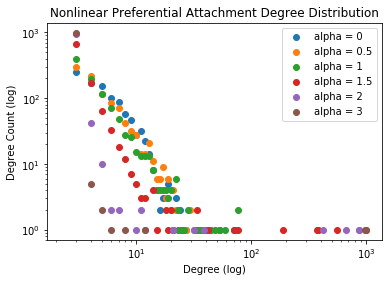

In [5]:
plt.scatter(degree_counts_1.keys(), degree_counts_1.values(), label='alpha = 0')
plt.scatter(degree_counts_2.keys(), degree_counts_2.values(), label='alpha = 0.5')
plt.scatter(degree_counts_3.keys(), degree_counts_3.values(), label='alpha = 1')
plt.scatter(degree_counts_4.keys(), degree_counts_4.values(), label='alpha = 1.5')
plt.scatter(degree_counts_5.keys(), degree_counts_5.values(), label='alpha = 2')
plt.scatter(degree_counts_6.keys(), degree_counts_6.values(), label='alpha = 3')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree (log)')
plt.ylabel('Degree Count (log)')
plt.title('Nonlinear Preferential Attachment Degree Distribution')
leg = plt.legend();

Per graph above, as alpha increases, it has higher degree. When α > 1, high-degree nodes accumulate new links much faster than low-degree nodes. As a consequence, one of the nodes will end up being connected to a fraction of all other nodes. 

In [6]:
# Compute for each network the largest degree and divide it by the size of the network (here 1000)
def highest_degree_ratio(G):
    highest = G.degree(max(G.nodes, key=G.degree))/1000
    return highest

NPA_1 = nonlinear_preferential_attachment(1000, 3, 0)
NPA_2 = nonlinear_preferential_attachment(1000, 3, 0.5)
NPA_3 = nonlinear_preferential_attachment(1000, 3, 1)
NPA_4 = nonlinear_preferential_attachment(1000, 3, 1.5)
NPA_5 = nonlinear_preferential_attachment(1000, 3, 2)
NPA_6 = nonlinear_preferential_attachment(1000, 3, 3)

r1 = highest_degree_ratio(NPA_1)
r2 = highest_degree_ratio(NPA_2)
r3 = highest_degree_ratio(NPA_3)
r4 = highest_degree_ratio(NPA_4)
r5 = highest_degree_ratio(NPA_5)
r6 = highest_degree_ratio(NPA_6)

ratio = [r1, r2, r3, r4, r5, r6]

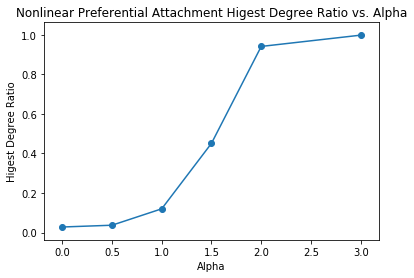

In [7]:
# Plot the ratio as a function of alpha
plt.plot(alpha_list, ratio)
plt.scatter(alpha_list, ratio)
plt.xlabel('Alpha')
plt.ylabel('Higest Degree Ratio')
plt.title('Nonlinear Preferential Attachment Higest Degree Ratio vs. Alpha');

From the graph above, we can see that as alpha increases, the highest degree ratio increases as well.

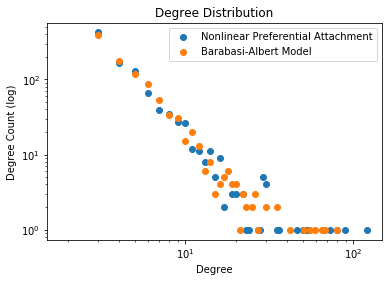

In [8]:
# Compare the model for alpha=1 with the Barabasi-Albert model, with the same parameters
NPA = nonlinear_preferential_attachment(1000, 3, 1)
BA = nx.barabasi_albert_graph(1000, 3)

degree_sequence_NPA = [NPA.degree(n) for n in NPA.nodes]
degree_sequence_BA = [BA.degree(n) for n in BA.nodes]

degree_counts_NPA = Counter(degree_sequence_NPA)
degree_counts_BA = Counter(degree_sequence_BA)

plt.scatter(degree_counts_NPA.keys(), degree_counts_NPA.values(), label='Nonlinear Preferential Attachment')
plt.scatter(degree_counts_BA.keys(), degree_counts_BA.values(), label='Barabasi-Albert Model')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('Degree Count (log)')
plt.title('Degree Distribution')
leg = plt.legend();

In [9]:
print("The average clustering coefficient for Nonlinear Preferential Attachment Model is ", nx.average_clustering(NPA))
print("The average clustering coefficient for Barabasi-Albert Model is ", nx.average_clustering(BA))

The average clustering coefficient for Nonlinear Preferential Attachment Model is  0.04378424630681736
The average clustering coefficient for Barabasi-Albert Model is  0.027700647721241246


In [10]:
import numpy as np
def knn(G):
    avg_nd_list = []
    for n in G.nodes():
        avg_neighbor_degree = np.array([G.degree(nei) for nei in G.neighbors(n)]).mean()
        pair = (G.degree(n), avg_neighbor_degree)
        avg_nd_list.append(pair)
    return pd.DataFrame(avg_nd_list, columns=['k', 'avg_neighbor_degree']).groupby('k').mean().reset_index()

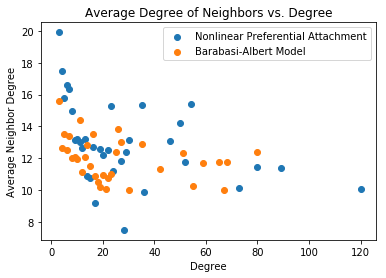

In [11]:
#  knn as a function of k (average degree of neighbors of nodes with degree k as a function of k).
import pandas as pd
df_NPA = knn(NPA)
df_BA = knn(BA)

plt.scatter(df_NPA['k'], df_NPA['avg_neighbor_degree'], label='Nonlinear Preferential Attachment')
plt.scatter(df_BA['k'], df_BA['avg_neighbor_degree'], label='Barabasi-Albert Model')
plt.xlabel('Degree')
plt.ylabel('Average Neighbor Degree')
plt.title('Average Degree of Neighbors vs. Degree')
leg = plt.legend();

From the graph above, we can see that as degree increases, the average degree of neighbors decreases for both models

### Q5. Attractiveness model
Code the attractiveness model, for A=0,1,3,5,10. The number of nodes is 1000, each node brings in 3 new links. You can start from a triangle. 

* Generate one network for each A-value and compute the degree distribution. Put them all in the same plot, in double logarithmic scale. How does the degree distribution change with A? Explain your answer.

* For each A-value generate 10 different networks. Compute the average clustering coefficient (averaged over the 10 realizations) as a function of A.



In [12]:
def attractiveness_model(N, m, A):
    # 1. Start with a triangle
    G = nx.cycle_graph(m)
    
    for i in range(G.number_of_nodes(), N):
        # 2. Select m different nodes at random, weighted by their degree.
        new_neighbors = []
        possible_neighbors = list(G.nodes)
        for _ in range(m):
            degrees = [G.degree(n) for n in possible_neighbors]
            p = [i + A for i in degrees]
            j = rn.choices(possible_neighbors, p)[0] 
            new_neighbors.append(j)
            possible_neighbors.remove(j)
        
        # 3. Add a new node i and link it with the m nodes from the previous step.
        for j in new_neighbors:
            G.add_edge(i, j)
    return G

In [13]:
# get degree list for each A and put in a dictionary
A_list = [0, 1, 3, 5, 10]

degree_list = []
for A in A_list:
    G = attractiveness_model(1000, 3, A) 
    degree_sequence = [G.degree(n) for n in G.nodes]
    degree_list.append((A, degree_sequence))
degree_dict = dict(degree_list)

In [14]:
# get degree count for each A
degree_counts_1 = Counter(degree_dict[0])
degree_counts_2 = Counter(degree_dict[1])
degree_counts_3 = Counter(degree_dict[3])
degree_counts_4 = Counter(degree_dict[5])
degree_counts_5 = Counter(degree_dict[10])

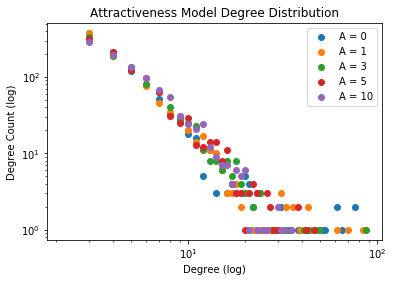

In [15]:
plt.scatter(degree_counts_1.keys(), degree_counts_1.values(), label='A = 0')
plt.scatter(degree_counts_2.keys(), degree_counts_2.values(), label='A = 1')
plt.scatter(degree_counts_3.keys(), degree_counts_3.values(), label='A = 3')
plt.scatter(degree_counts_4.keys(), degree_counts_4.values(), label='A = 5')
plt.scatter(degree_counts_5.keys(), degree_counts_5.values(), label='A = 10')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree (log)')
plt.ylabel('Degree Count (log)')
plt.title('Attractiveness Model Degree Distribution')
leg = plt.legend();

Per graph above, as A increases, the lower degree values it contains

In [16]:
A_list = [0, 1, 3, 5, 10]

avg_clustering = []

for A in A_list:
    clustering_co_list = []
    
    # generate 10 different networks
    for i in range(10):
        G = attractiveness_model(1000, 3, A) 

        clustering_co = nx.average_clustering(G)
        clustering_co_list.append(clustering_co)

    # calculate the average of the clustering list for each p 
    avg_clustering_co = statistics.mean(clustering_co_list)
    avg_clustering_co_pair = (A, avg_clustering_co)
    avg_clustering.append(avg_clustering_co_pair)    
    
# return a dictionary
avg_clustering = dict(avg_clustering)

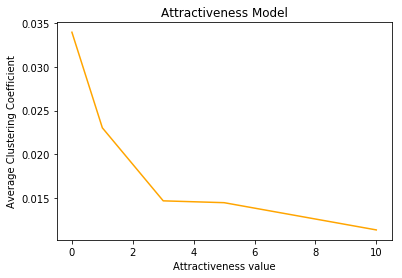

In [17]:
x = avg_clustering.keys()
y = avg_clustering.values()

plt.plot(x, y, color = 'orange', label='Average Clustering Coefficient') 
plt.xlabel('Attractiveness value')
plt.ylabel('Average Clustering Coefficient')
plt.title('Attractiveness Model');

Per graph above, as Attractiveness A increases, the Average Clustering Coefficient of Attractiveness Model decrease.

### Q6. Random walk model
Code the random walk model. Take the following values of the triadic closure probability p: 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. The number of nodes is 1000, each node brings in 3 new links. You can start from a triangle.

* Generate one network for each p-value and compute the degree distribution.Put them all in the same plot, in double logarithmic scale. How does the degree distribution change with p? Explain your answer.

* For each p-value generate 10 different networks. Compute the average clustering coefficient (averaged over the 10 realizations) as a function of p.



In [36]:
def random_walk(N, m, p):
    # Start with a triangle with m nodes
    G = nx.cycle_graph(m)
    
    # at each step
    for i in range(G.number_of_nodes(), N):
        # add a new node i to the graph   
        possible_nodes = list(G.nodes)
        
        for r in range(m-2):

            # randomly select node j from the graph

            j = rn.choices(possible_nodes)[0]
    
            G.add_edge(i, j)
 
            # remove node j for possible chosen nodes as it is already chosen once
            possible_nodes.remove(j)

            # Check probability p the link is set with neighnor of j, chosen at random
            if rn.random() < p:
                # With probability p the link is set with a neighbor of j, chosen at random
                neighbors = list(G.neighbors(j))
                u = rn.choices(list(neighbors))[0]
                G.add_edge(i, u)
            else: 
                # With probability 1–p the link is set with a randomly chosen node
                v = rn.choices(possible_nodes)[0]
                G.add_edge(i, v)            
    return G

In [37]:
G = random_walk(10, 3, 0.1)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 10
Number of edges: 17
Average degree:   3.4000


In [38]:
# updated the random walk function on April 25th when working on Final exame

def random_walk(N, m, p):
    # Start with a triangle with m nodes
    G = nx.cycle_graph(m)
    
    # at each step
    for i in range(G.number_of_nodes(), N):
        # add a new node i to the graph   
        possible_nodes = list(G.nodes)

        # randomly select node j from the graph
        j = rn.choices(possible_nodes)[0]
        G.add_edge(i, j)

        # remove node j for possible chosen nodes as it is already chosen once
        possible_nodes.remove(j)

        # Check probability p the link is set with neighnor of j, chosen at random
        if rn.random() < p:
            # With probability p the link is set with a neighbor of j, chosen at random
            neighbors = list(G.neighbors(j))
            u = rn.choices(list(neighbors))[0]
            G.add_edge(i, u)
        else: 
            # With probability 1–p the link is set with a randomly chosen node
            v = rn.choices(possible_nodes)[0]
            G.add_edge(i, v)            
    return G

In [39]:
G = random_walk(10, 3, 0.1)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 10
Number of edges: 17
Average degree:   3.4000


In [30]:
p_list = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

degree_list = []
for p in p_list:
    G = random_walk(1000, 3, p) 
    degree_sequence = [G.degree(n) for n in G.nodes]
    degree_list.append((p, degree_sequence))
degree_dict = dict(degree_list)

In [20]:
# get degree count for each p
degree_counts_1 = Counter(degree_dict[0])
degree_counts_2 = Counter(degree_dict[0.1])
degree_counts_3 = Counter(degree_dict[0.2])
degree_counts_4 = Counter(degree_dict[0.3])
degree_counts_5 = Counter(degree_dict[0.4])
degree_counts_6 = Counter(degree_dict[0.5])
degree_counts_7 = Counter(degree_dict[0.6])
degree_counts_8 = Counter(degree_dict[0.7])
degree_counts_9 = Counter(degree_dict[0.8])
degree_counts_10 = Counter(degree_dict[0.9])
degree_counts_11 = Counter(degree_dict[1])

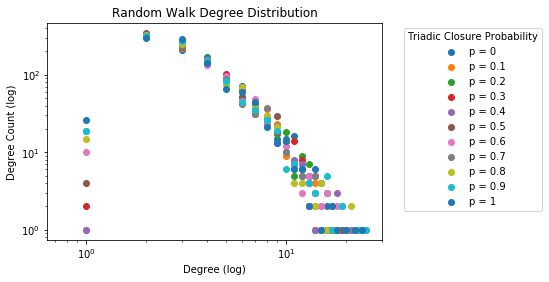

In [21]:
plt.scatter(degree_counts_1.keys(), degree_counts_1.values(), label='p = 0')
plt.scatter(degree_counts_2.keys(), degree_counts_2.values(), label='p = 0.1')
plt.scatter(degree_counts_3.keys(), degree_counts_3.values(), label='p = 0.2')
plt.scatter(degree_counts_4.keys(), degree_counts_4.values(), label='p = 0.3')
plt.scatter(degree_counts_5.keys(), degree_counts_5.values(), label='p = 0.4')
plt.scatter(degree_counts_6.keys(), degree_counts_6.values(), label='p = 0.5')
plt.scatter(degree_counts_7.keys(), degree_counts_7.values(), label='p = 0.6')
plt.scatter(degree_counts_8.keys(), degree_counts_8.values(), label='p = 0.7')
plt.scatter(degree_counts_9.keys(), degree_counts_9.values(), label='p = 0.8')
plt.scatter(degree_counts_10.keys(), degree_counts_10.values(), label='p = 0.9')
plt.scatter(degree_counts_11.keys(), degree_counts_11.values(), label='p = 1')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree (log)')
plt.ylabel('Degree Count (log)')
plt.title('Random Walk Degree Distribution')
leg = plt.legend(title='Triadic Closure Probability', bbox_to_anchor=(1.05, 1), loc='upper left');

Per graph above, as p increases, the higher degree it contains, which means it has more hubs.

In [22]:
p_list = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

avg_clustering = []

for p in p_list:
    clustering_co_list = []
    
    # generate 10 different networks
    for i in range(10):
        G = random_walk(1000, 3, p) 

        clustering_co = nx.average_clustering(G)
        clustering_co_list.append(clustering_co)

    # calculate the average of the clustering list for each p 
    avg_clustering_co = statistics.mean(clustering_co_list)
    avg_clustering_co_pair = (p, avg_clustering_co)
    avg_clustering.append(avg_clustering_co_pair)    
    
# return a dictionary
avg_clustering = dict(avg_clustering)

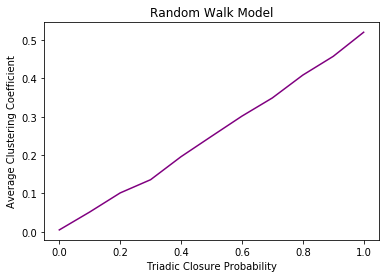

In [23]:
x = avg_clustering.keys()
y = avg_clustering.values()

plt.plot(x, y, color = 'purple', label='Average Clustering Coefficient') 
plt.xlabel('Triadic Closure Probability')
plt.ylabel('Average Clustering Coefficient')
plt.title('Random Walk Model');

Per graph above, as Triadic Closure Probability p increases, the Average Clustering Coefficient increase as well.

In [24]:
x = list(x)
y = list(y)
res = [i / j for i, j in zip(y[1:], x[1:])]
statistics.mean(res)

0.5004161187259394

We can conclude that y = 0.5x where x stands for the Triadic Closure Probability p and y stands for the Average Clustering Coefficient. 